In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector



def superdense_coding_circuit(b1, b2):
    q = QuantumRegister(2)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q, c)
    
    qc.h(q[0])
    qc.cx(q[0], q[1])
    
    if b1 == 1:
        qc.x(q[0])
    if b2 == 1:
        qc.z(q[0])
    
    qc.cx(q[0], q[1])
    qc.h(q[0])
    
    return qc


results = {}
for b1 in [0, 1]:
    for b2 in [0, 1]:
        qc = superdense_coding_circuit(b1, b2)
        sv = Statevector.from_instruction(qc)
        results[(b1, b2)] = sv
results

{(0,
  0): Statevector([ 1.00000000e+00+0.j, -2.23711432e-17+0.j,  0.00000000e+00+0.j,
               0.00000000e+00+0.j],
             dims=(2, 2)),
 (0,
  1): Statevector([-2.23711432e-17+0.j,  1.00000000e+00+0.j,  0.00000000e+00+0.j,
               0.00000000e+00+0.j],
             dims=(2, 2)),
 (1,
  0): Statevector([ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  1.00000000e+00+0.j,
              -2.23711432e-17+0.j],
             dims=(2, 2)),
 (1,
  1): Statevector([ 0.00000000e+00+0.j,  0.00000000e+00+0.j, -2.23711432e-17+0.j,
               1.00000000e+00+0.j],
             dims=(2, 2))}

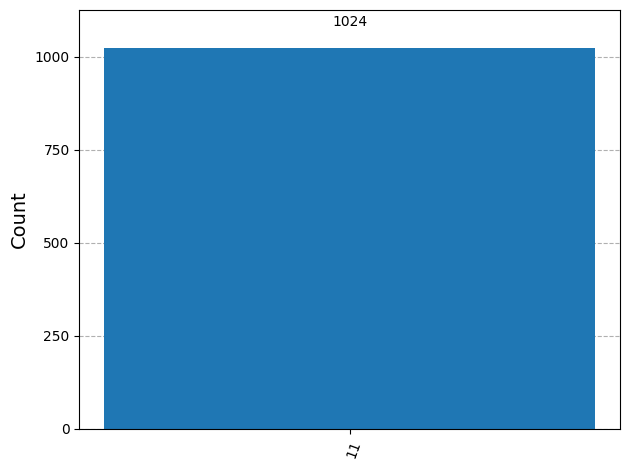

In [26]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Sampler


qc = QuantumCircuit(2, 2)
qc.x(0) 
qc.x(1)  
qc.measure([0, 1], [0, 1]) 

backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts)






C:\Users\Adeesh\AppData\Local\Temp\ipykernel_28072\1640151886.py:12: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService()
c:\Users\Adeesh\miniconda3\envs\soc\Lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:1129: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


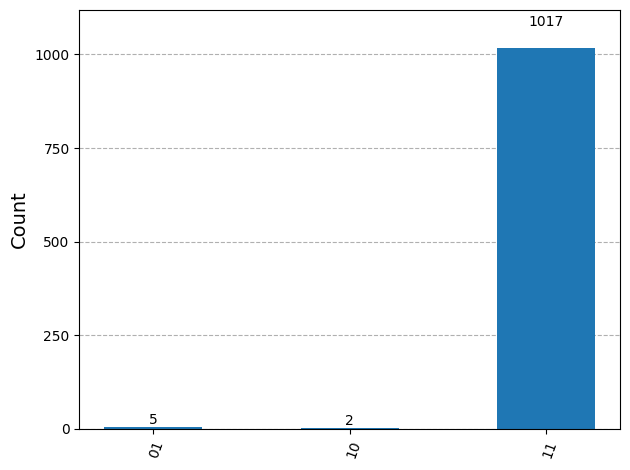

In [27]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Sampler


qc = QuantumCircuit(2, 2)
qc.x(0) 
qc.x(1)  
qc.measure([0, 1], [0, 1]) 
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()

backend = service.least_busy(operational=True, min_num_qubits=5)
qc_compiled = transpile(qc, backend, optimization_level=2)
sampler = Sampler(mode=backend)

job = sampler.run([qc_compiled],shots=1024)
result = job.result()
pub_result = result[0]
counts = pub_result.data.c.get_counts()
plot_histogram(counts)

